# Project 2: Ames Housing Price Predictions

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Introduction:-Bayesian-Linear-Regression" data-toc-modified-id="Introduction:-Bayesian-Linear-Regression-0.1">Introduction: Bayesian Linear Regression</a></span></li><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-0.2">Import libraries</a></span></li><li><span><a href="#Initial-Look-at-Datasets" data-toc-modified-id="Initial-Look-at-Datasets-0.3">Initial Look at Datasets</a></span></li><li><span><a href="#Observations" data-toc-modified-id="Observations-0.4">Observations</a></span></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1">Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Check-for-missing-values" data-toc-modified-id="Check-for-missing-values-1.1">Check for missing values</a></span></li><li><span><a href="#Check-data-types-of-missing-values" data-toc-modified-id="Check-data-types-of-missing-values-1.2">Check data types of missing values</a></span></li><li><span><a href="#Handling-Null-Values-and-Relevant-Data-Types" data-toc-modified-id="Handling-Null-Values-and-Relevant-Data-Types-1.3">Handling Null Values and Relevant Data Types</a></span></li><li><span><a href="#Interactions" data-toc-modified-id="Interactions-1.4">Interactions</a></span></li><li><span><a href="#Format-by-Renaming,-Replacing" data-toc-modified-id="Format-by-Renaming,-Replacing-1.5">Format by Renaming, Replacing</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2">Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Unvariate-Analysis" data-toc-modified-id="Unvariate-Analysis-2.1">Unvariate Analysis</a></span></li><li><span><a href="#Bivariate-Analysis" data-toc-modified-id="Bivariate-Analysis-2.2">Bivariate Analysis</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3">Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Modeling-the-Data" data-toc-modified-id="Modeling-the-Data-3.1">Modeling the Data</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-3.2">Model Evaluation</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-3.2.1">Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Plot-Residuals" data-toc-modified-id="Plot-Residuals-3.2.1.1">Plot Residuals</a></span></li><li><span><a href="#Coefficient-of-Determination" data-toc-modified-id="Coefficient-of-Determination-3.2.1.2">Coefficient of Determination</a></span></li><li><span><a href="#K-Fold-Cross-Validation" data-toc-modified-id="K-Fold-Cross-Validation-3.2.1.3">K-Fold Cross Validation</a></span></li></ul></li></ul></li><li><span><a href="#Model-Scaling" data-toc-modified-id="Model-Scaling-3.3">Model Scaling</a></span><ul class="toc-item"><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-3.3.1">Ridge Regression</a></span></li><li><span><a href="#Lasso-Regression" data-toc-modified-id="Lasso-Regression-3.3.2">Lasso Regression</a></span></li></ul></li></ul></li></ul></div>

### Introduction: Bayesian Linear Regression

In this notebook, I will build a model to predict sale price of houses using Linear Regression. I implement a machine learning process of cleaning the data, conducting Exploratory Data Analysis(EDA), establishing baseline model through feature engineering as well as use Ridge Regression and Lasso Regression for comparison. By scrubbing the data and investigating trends with visual plots as well as mathetmatical assessments, the features input in the model should produce predictions for sale price of a house. 

### Import libraries

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import patsy
import datetime
import math

from pandas import DataFrame
from numpy import NaN, NAN, nan
from matplotlib import colors as mcolors
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn import datasets, linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from jupyterthemes import jtplot
jtplot.style(theme= 'gruvboxd', context='notebook', ticks=True, grid=False)

pd.options.display.max_rows = 200
pd.options.display.max_columns = 200

%matplotlib inline
%autosave 60

df_train = pd.read_csv('./datasets/train.csv') # Read in train dataset
df_test = pd.read_csv('./datasets/test.csv')   # Read in test dataset

Autosaving every 60 seconds


### Initial Look at Datasets

In [116]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [117]:
df_train = df_train.set_index('Id')
df_test = df_test.set_index('Id')

Column "Id" does not need to kept as a data column. I set column "Id" to index since PID is an identifier that can be used with city web site for parcel review. This means it's a better representation than simply "Id" which is limited in how it can be used as an identified. 

### Observations
    
- Data types included in datasets are object, float64, int64. Some data types will likely need to be converted to a different dtype based on first look at categories and values.
- The columns with "Year" and "Yr" need values changed from int64 to strings.
- There are column titles that need to be edited for spacing and to be more self-explanatory. 
- There are some columns that can be consolidated with 'interaction' to minimize redundant and unnecessary values.  
- Train and Test datasets should be cleaned simultaneously.
- System needed to organize Ordinal, Nominal, Discrete, Continuous categories.
- Garages and basements are not included in a house's total sq_ft.

In [118]:
df_train.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [119]:
df_train.drop(df_train.index[df_train['Garage Yr Blt'] == 2207], inplace=True)

From this first look at the data, column 'Garage Yr Blt' has a max value of '2207'. Dropped outlier '2207' year because the datasets are listed reports for years 2006 to 2010.

In [120]:
df_test.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,8.790000e+02,879.000000,719.000000,879.000000,879.000000,879.000000,879.000000,879.000000,878.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,834.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,7.165050e+08,58.270762,69.630042,10340.920364,6.054608,5.565415,1970.533561,1984.444824,106.982916,443.397042,53.835040,539.518771,1036.750853,1148.053470,349.751991,2.725825,1500.531286,0.440273,0.055745,1.541524,0.399317,2.879408,1.047782,6.459613,0.618885,1976.796163,1.744027,470.832765,93.560865,47.478953,24.037543,2.594994,14.813424,1.882821,48.443686,6.207053,2007.824801
std,1.889135e+08,42.211389,23.625372,10047.335167,1.374756,1.128422,30.403527,20.454546,188.356829,442.480223,178.539854,426.082726,419.258428,381.022337,434.595133,32.554124,517.413260,0.529983,0.229560,0.560908,0.506045,0.830249,0.223844,1.603071,0.669313,25.695683,0.751162,213.070155,121.174306,69.209179,73.212237,24.948416,52.975963,29.899698,549.858353,2.644097,1.327396
min,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.284861e+08,20.000000,59.000000,7298.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,790.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,5.354542e+08,50.000000,68.000000,9453.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,374.000000,0.000000,453.000000,975.000000,1064.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.071921e+08,70.000000,80.000000,11606.500000,7.000000,6.000000,2000.000000,2003.000000,173.500000,735.500000,0.000000,781.500000,1248.000000,1358.000000,720.000000,0.000000,1781.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,3138.000000,3138.000000,2065.000000,481.000000,4676.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


Test dataset does not have 'Garage Yr Blt' year 2027 outlier value found in train dataset.

In [121]:
df_train.drop(columns=['PID'], inplace=True)
df_test.drop(columns=['PID'], inplace=True)

'PID' doesn't give any valuable information in predicting housing prices so it can be dropped.

In [122]:
df_train.shape

(2050, 79)

In [123]:
df_test.shape

(879, 78)

Train dataset has 1179 more rows than test datatset which means test dataset does not have all the same values as train dataset. Train dataset also has 79 columns and test dataset has 78 columns. The one column that is included only in train dataset will need to be determined.

In [124]:
df_test.columns 

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

In [125]:
df_train.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

Column 'SalePrice' exists in train dataset but does not exist in test dataset

In [126]:
df_train.duplicated().sum()

0

In [127]:
df_test.duplicated().sum()

0

There are zero duplicates found in both the train and test datasets.

## Data Cleaning

### Check for missing values

In [128]:
null_columns=df_train.columns[df_train.isnull().any()]
df_train[null_columns].isnull().sum()

Lot Frontage       330
Alley             1910
Mas Vnr Type        21
Mas Vnr Area        21
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2041
Fence             1650
Misc Feature      1985
dtype: int64

There are 26 columns with null values out of 79 columns for train dataset.

In [129]:
null_columns_test=df_test.columns[df_test.isnull().any()]
df_test[null_columns_test].isnull().sum()

Lot Frontage      160
Alley             821
Mas Vnr Type        1
Mas Vnr Area        1
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 1     25
BsmtFin Type 2     25
Electrical          1
Fireplace Qu      422
Garage Type        44
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Pool QC           875
Fence             707
Misc Feature      838
dtype: int64

There are 19 columns with null values out of 78 columns for test datatset. The 19 columns with null values match the features columns with null values in train dataset. 

### Check data types of missing values

In [130]:
df_train[null_columns].dtypes

Lot Frontage      float64
Alley              object
Mas Vnr Type       object
Mas Vnr Area      float64
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Fireplace Qu       object
Garage Type        object
Garage Yr Blt     float64
Garage Finish      object
Garage Cars       float64
Garage Area       float64
Garage Qual        object
Garage Cond        object
Pool QC            object
Fence              object
Misc Feature       object
dtype: object

In [131]:
df_test[null_columns].dtypes

Lot Frontage      float64
Alley              object
Mas Vnr Type       object
Mas Vnr Area      float64
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1        int64
BsmtFin Type 2     object
BsmtFin SF 2        int64
Bsmt Unf SF         int64
Total Bsmt SF       int64
Bsmt Full Bath      int64
Bsmt Half Bath      int64
Fireplace Qu       object
Garage Type        object
Garage Yr Blt     float64
Garage Finish      object
Garage Cars         int64
Garage Area         int64
Garage Qual        object
Garage Cond        object
Pool QC            object
Fence              object
Misc Feature       object
dtype: object

There are null values found with data types: float64, int64, and object for both Train and Test datasets.

### Handling Null Values and Relevant Data Types

In [132]:
df_train['Lot Frontage'] = df_train['Lot Frontage'].fillna(0).astype(int)

Filled 'Na' values for 'Lot Frontage' with 0 because it is possible for there to be 0 sq_ft between the street and front of the house.

In [133]:
df_train['Garage Cars'] = df_train['Garage Cars'].fillna(0).astype(int)

In [134]:
df_test['Garage Cars'] = df_test['Garage Cars'].fillna(0).astype(int)

In [135]:
df_train['Garage Area'] = df_train['Garage Area'].fillna(0).astype(int)

In [136]:
df_test['Garage Area'] = df_test['Garage Area'].fillna(0).astype(int)

In [137]:
df_train['Bsmt Full Bath'] = df_train['Bsmt Full Bath'].fillna(0).astype(int)

In [138]:
df_test['Bsmt Full Bath'] = df_test['Bsmt Full Bath'].fillna(0).astype(int)

In [139]:
df_train['Bsmt Half Bath'] = df_train['Bsmt Half Bath'].fillna(0).astype(int)

In [140]:
df_test['Bsmt Half Bath'] = df_test['Bsmt Half Bath'].fillna(0).astype(int)

In [141]:
df_train['BsmtFin SF 1'] = df_train['BsmtFin SF 1'].fillna(0).astype(int)

In [142]:
df_test['BsmtFin SF 1'] = df_test['BsmtFin SF 1'].fillna(0).astype(int)

In [143]:
df_train['BsmtFin SF 2'] = df_train['BsmtFin SF 2'].fillna(0).astype(int)

In [144]:
df_test['BsmtFin SF 2'] = df_test['BsmtFin SF 2'].fillna(0).astype(int)

In [145]:
df_train['Bsmt Unf SF'] = df_train['Bsmt Unf SF'].fillna(0).astype(int)

In [146]:
df_test['Bsmt Unf SF'] = df_test['Bsmt Unf SF'].fillna(0).astype(int)

In [147]:
df_train['Total Bsmt SF'] = df_train['Total Bsmt SF'].fillna(0).astype(int)

In [148]:
df_test['Total Bsmt SF'] = df_test['Total Bsmt SF'].fillna(0).astype(int)

Converted the 'Na' values to 0 for the columns above. From there, if float data type, converted to integer so appropriate data types given to features are consistent in both Train and Test datasets.

In [149]:
df_train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,60,RL,0,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533,Unf,0,192,725,GasA,Ex,Y,SBrkr,725,754,0,1479,0,0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2,475,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,60,RL,43,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637,Unf,0,276,913,GasA,Ex,Y,SBrkr,913,1209,0,2122,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2,559,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,20,RL,68,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731,Unf,0,326,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,1,0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1,246,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,60,RL,73,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,SBrkr,744,700,0,1444,0,0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,50,RL,82,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0,Unf,0,676,676,GasA,TA,Y,SBrkr,831,614,0,1445,0,0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2,484,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [150]:
df_test.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
2718,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2414,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
1989,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
625,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


While 'Na' values successfully converted to '0' values, 'NaN' values still exists in Train and Test datasets. Not all 'NaN' values necessarily the absence of a countable value Instead, it identifies a feature that does not exist/is available. Knowing this, I'm going to convert 'NA' to 'None'.

In [151]:
df_train['Fireplace Qu'] = df_train['Fireplace Qu'].str.replace('NA', 'None')

In [152]:
df_test['Fireplace Qu'] = df_test['Fireplace Qu'].str.replace('NA', 'None')

In [153]:
df_train['Bsmt Qual'] = df_train['Bsmt Qual'].str.replace('NA', 'None')

In [154]:
df_test['Bsmt Qual'] = df_test['Bsmt Qual'].str.replace('NA', 'None')

In [155]:
df_train['Bsmt Cond'] = df_test['Bsmt Cond'].str.replace('NA', 'None')

In [156]:
df_test['Bsmt Cond'] = df_test['Bsmt Cond'].str.replace('NA', 'None')

In [157]:
df_train['Garage Yr Blt'] = df_train['Garage Yr Blt'].fillna(0).astype(int)

Filled 'Garage Yr Blt' column NaN values with 0 so that all values can be integers. Because values are now all the same data type, the 0 values can be dropped. It does not make sense to have houses built in year '0' and therefore not useful to keep those rows.

In [158]:
df_train['Garage Yr Blt'].replace(0, np.nan,inplace=True)

In [159]:
df_train['Garage Yr Blt'].dropna(how='any',axis=0, inplace=True)

In [160]:
df_train['MS SubClass'] = df_train['MS SubClass'].astype(str)

In [161]:
df_test['MS SubClass'] = df_test['MS SubClass'].astype(str)

In [162]:
df_train['Mo Sold'] = df_train['Mo Sold'].astype(str)

In [163]:
df_test['Mo Sold'] = df_test['Mo Sold'].astype(str)

In [164]:
df_train['Yr Sold'] = df_train['Yr Sold'].astype(str)

In [165]:
df_test['Yr Sold'] = df_test['Yr Sold'].astype(str)

### Interactions

In [166]:
df_train['BsmtFin SF'] = df_train['BsmtFin SF 1']*df_train['BsmtFin SF 2'] 

In [167]:
df_test['BsmtFin SF'] = df_test['BsmtFin SF 1']*df_test['BsmtFin SF 2'] 

In [168]:
df_train['Bsmt Qual'] = df_train['Bsmt Qual']*df_train['Bsmt Cond'] 

In [169]:
df_train['Overall Qual'] = df_train['Overall Qual']*df_train['Overall Cond'] 

In [170]:
df_test['Overall Qual'] = df_test['Overall Qual']*df_test['Overall Cond'] 

Interacted columns where values were similar so as to minimize redundancy, it makes sense to consolidate.

### Format by Renaming, Replacing

In [171]:
df_train.rename(columns = {'SalePrice':'Sale_Price'}, inplace=True) 

In [172]:
df_train.rename(columns = {'SaleType':'Sale_Type'}, inplace=True) 

In [173]:
df_test.rename(columns = {'SaleType':'Sale_Type'}, inplace=True) 

Reformatted column titles with underscore for readability. 

In [174]:
df_train.rename(columns = {'MS SubClass':'Residence_Type'}, inplace=True) 

In [175]:
df_test.rename(columns = {'MS SubClass':'Residence_Type'}, inplace=True) 

'MS SubClass' renamed to comprehensible definition, 'Residence Type'.

In [176]:
df_train.rename(columns = {'MS Zoning':'Property_Type'}, inplace=True) 

In [177]:
df_test.rename(columns = {'MS Zoning':'Property_Type'}, inplace=True)

'MS Zoning' renamed to comprehensible definition, 'Property Type'.

In [178]:
df_train.rename(columns = {'Fireplace Qu':'Fireplace Qual'}, inplace=True)

In [179]:
df_test.rename(columns = {'Fireplace Qu':'Fireplace Qual'}, inplace=True)

In [180]:
df_train.rename(columns = {'Pool QC':'Pool Qual'}, inplace=True)

In [181]:
df_test.rename(columns = {'Pool QC':'Pool Qual'}, inplace=True)

'Pool QC' and 'Fireplace Qu' renamed to 'Pool Qual' and 'Fireplace Qu' to match similar column names regarding 'quality'.

In [182]:
df_train.columns = df_train.columns.str.replace(' ', '_')

In [183]:
df_test.columns = df_test.columns.str.replace(' ', '_')

Reformatted column titles for both Train and Test datasets to all lowercase and replaced spaces with underscores for readability.

## Exploratory Data Analysis

### Unvariate Analysis

Firstly, taking a look at target variable- 'Sale_Price'.

<Figure size 1440x720 with 0 Axes>

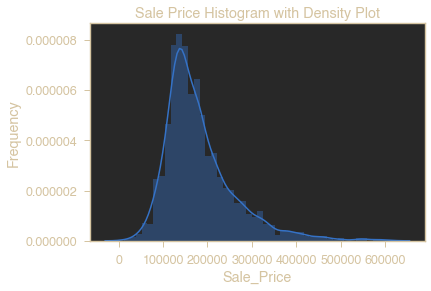

In [184]:
plt.figure(figsize=(20,10))
hist, ax = plt.subplots()
sns.distplot(df_train['Sale_Price'])
ax.set_title('Sale Price Histogram with Density Plot')
ax.set_ylabel('Frequency')
plt.show();

Histogram shows that 'Sale_Price' has a positively skewed distribution. This means the frequency of the houses sold at $100,000 will be the maximum. Positively skewed is also defined as the "mean" being greater than the "median".

### Bivariate Analysis

I want to know which numerical and/or categorical features have a high impact on 'Sale_Price'. Because I plan to assess multiple features by plotting, I will need have the ability to easily input numerical and categorical features.

In [185]:
# This will only include numerical features with integer and float data types
num_feat = df_train.select_dtypes(include=['int64', 'float64']).columns

# Sale_Price is dropped. It's the target variable on the y-axis and is what we want to predict
num_feat = num_feat.drop(['Sale_Price'])

# This will only include categorical features with object/string data type
cat_feat = df_train.select_dtypes(include=['object']).columns

To identify which numerical features have a high impact on 'Sale_Price', scatterplots can compare multiple features at once.

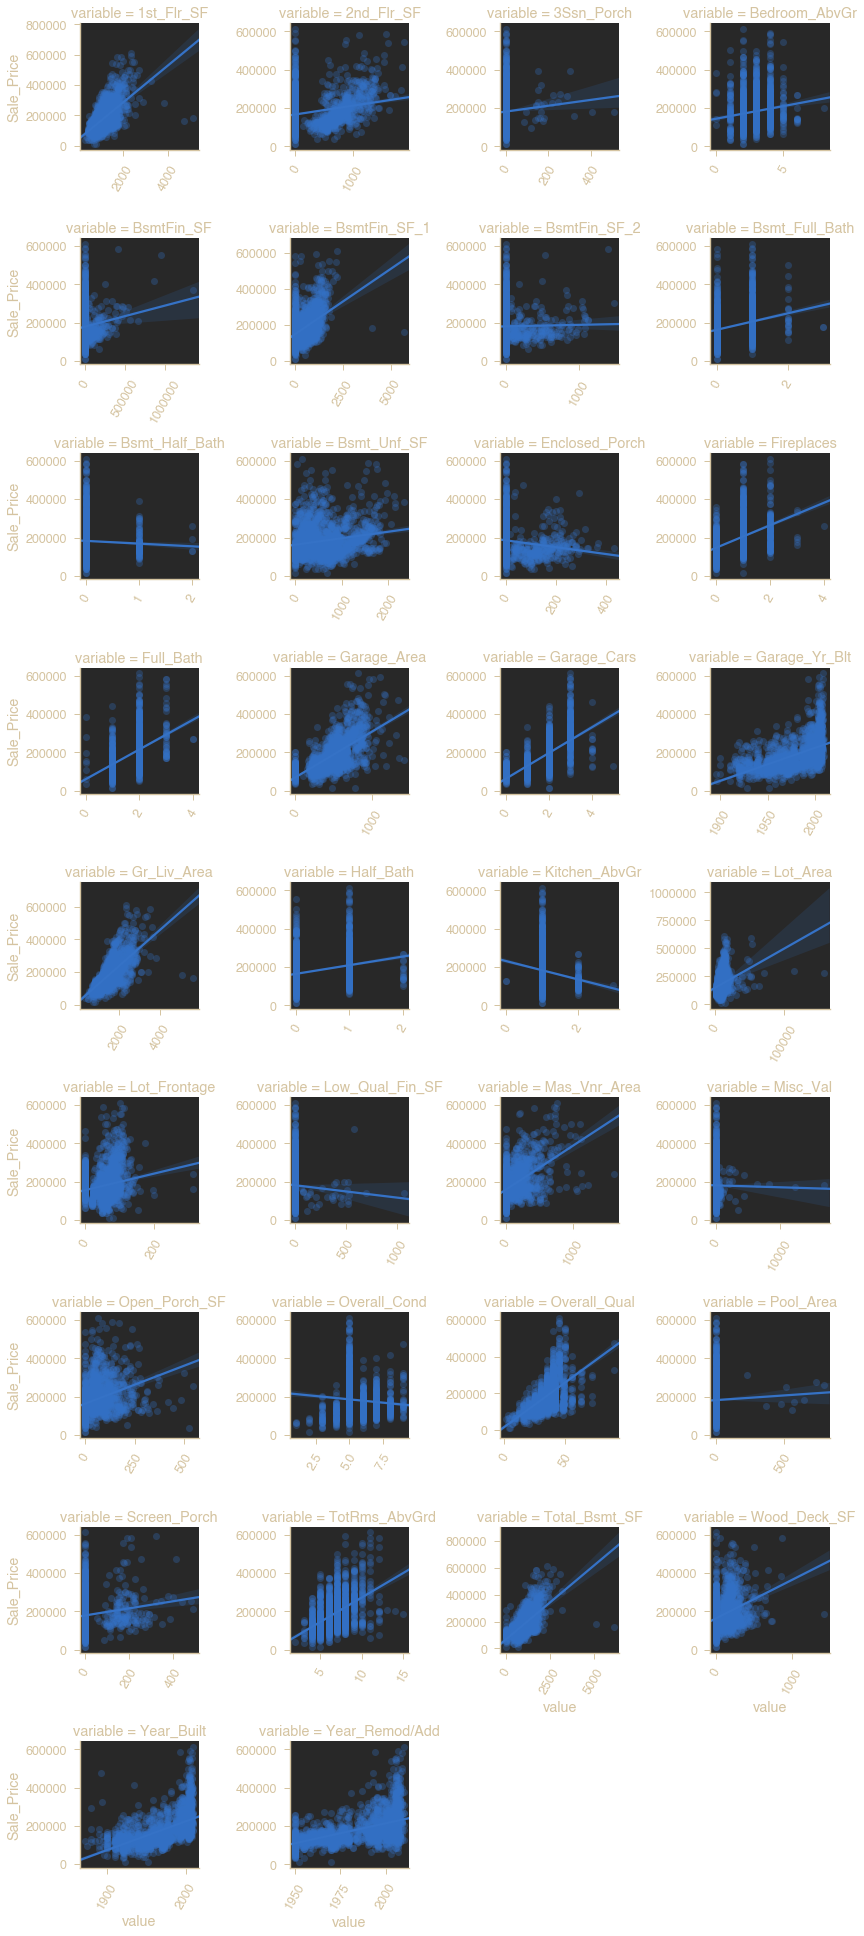

In [186]:
f = pd.melt(df_train, id_vars=['Sale_Price'], value_vars=sorted(num_feat))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'Sale_Price', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

These scatterplots show me the relationship of numerical features to 'Sale_Price'. I wanted to be able to plot multiple feature values/instances with the same plot on different subsets. I couldn't have used pairplot as pairplot would be unable to account for subsets. 

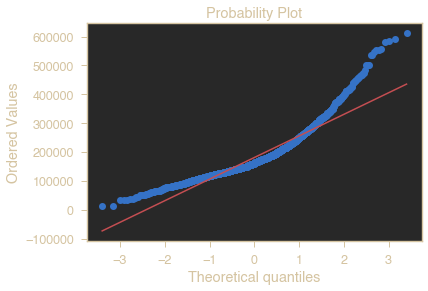

In [187]:
fig = plt.figure()
res = stats.probplot(df_train.Sale_Price, plot=plt)
plt.show()

<Figure size 2880x2160 with 0 Axes>

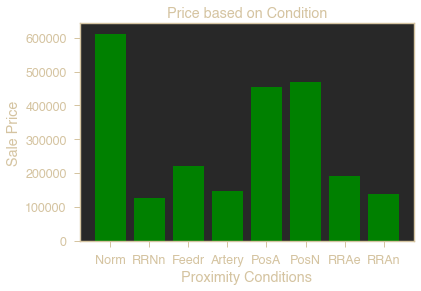

In [188]:
plt.figure(figsize=(40,30))
count, ax = plt.subplots()

plt.bar(df_train['Condition_2'],
            df_train['Sale_Price'],
            color='green');
ax.set_title('Price based on Condition')
ax.set_xlabel('Proximity Conditions')
ax.set_ylabel('Sale Price')

plt.show();

Proximity conditions are the surrounding environment's industrial factors. This plot shows a house price influenced by its surroundings. It shows that houses near railroads (e.g. RRAn, RRAe, RRNn, are the least expensive).

<Figure size 2160x1440 with 0 Axes>

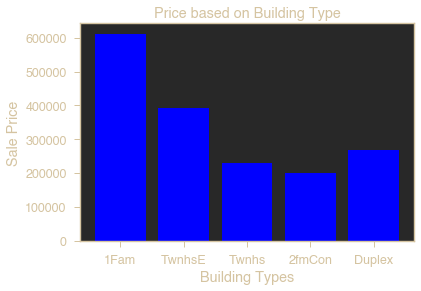

In [189]:
plt.figure(figsize=(30,20))
count, ax = plt.subplots()

plt.bar(df_train['Bldg_Type'],
            df_train['Sale_Price'],
            color='blue');
ax.set_title('Price based on Building Type')
ax.set_xlabel('Building Types')
ax.set_ylabel('Sale Price')
plt.show();

<Figure size 2160x1440 with 0 Axes>

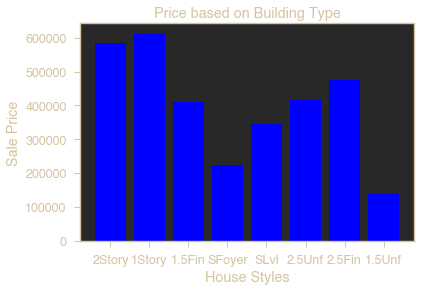

In [190]:
plt.figure(figsize=(30,20))
count, ax = plt.subplots()

plt.bar(df_train['House_Style'],
            df_train['Sale_Price'],
            color='blue');
ax.set_title('Price based on Building Type')
ax.set_xlabel('House Styles')
ax.set_ylabel('Sale Price')
plt.show();

Plots with 'House_Style' and 'Bldg_Type' showed that priciest was 'Single Family, 1-Story' and least expensive was condomonium. 

<Figure size 2160x1440 with 0 Axes>

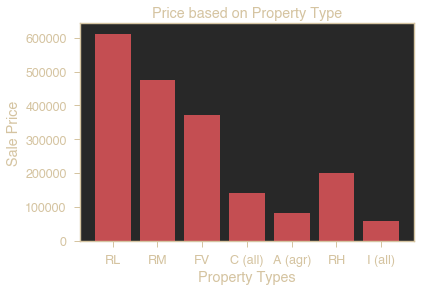

In [191]:
plt.figure(figsize=(30,20))
count, ax = plt.subplots()

plt.bar(df_train['Property_Type'],
            df_train['Sale_Price'],
            color='r');
ax.set_title('Price based on Property Type')
ax.set_xlabel('Property Types')
ax.set_ylabel('Sale Price')
plt.show();

Bar plot shows the property types ranked from priced highest to priced lowest:
1. Residential Low Density (RL)
2. Residential Medium Density (RM)
3. Floating Village (FV)
4. Agriculture (agr)
5. Residential High Density (RH)
6. Commercial (C)
7. Industrial(I)

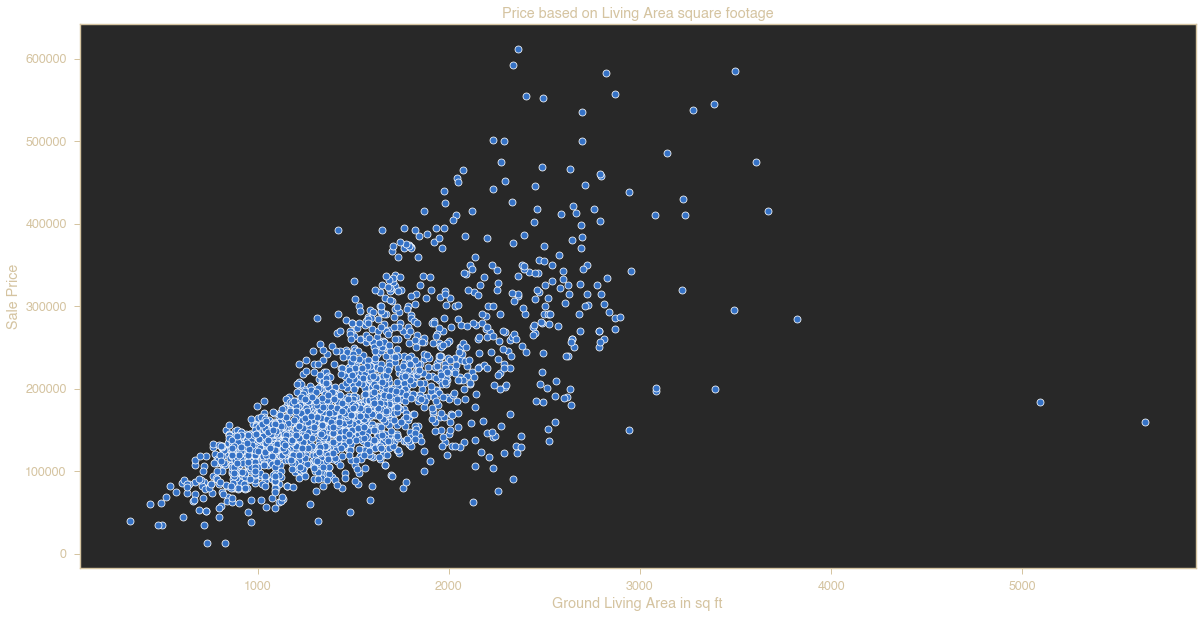

In [192]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x='Gr_Liv_Area', y='Sale_Price', data=df_train)
ax.set_title('Price based on Living Area square footage')
ax.set_xlabel('Ground Living Area in sq ft')
ax.set_ylabel('Sale Price');

Scatterplot shows there are outliers, especially a couple past the 4000

In [193]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 109 to 10
Data columns (total 80 columns):
Residence_Type     2050 non-null object
Property_Type      2050 non-null object
Lot_Frontage       2050 non-null int64
Lot_Area           2050 non-null int64
Street             2050 non-null object
Alley              140 non-null object
Lot_Shape          2050 non-null object
Land_Contour       2050 non-null object
Utilities          2050 non-null object
Lot_Config         2050 non-null object
Land_Slope         2050 non-null object
Neighborhood       2050 non-null object
Condition_1        2050 non-null object
Condition_2        2050 non-null object
Bldg_Type          2050 non-null object
House_Style        2050 non-null object
Overall_Qual       2050 non-null int64
Overall_Cond       2050 non-null int64
Year_Built         2050 non-null int64
Year_Remod/Add     2050 non-null int64
Roof_Style         2050 non-null object
Roof_Matl          2050 non-null object
Exterior_1st       2

In [194]:
# Check how many rows would be dropped if sq_ft is greater than or equal to 4000. 
df_train.index[df_train['Gr_Liv_Area'] >= 4000] 

Int64Index([1499, 2181], dtype='int64', name='Id')

In [195]:
# Only 2 outliers and so have decided to drop rows if sq_ft is greater than or equal to 4000.
df_train.drop(df_train.index[df_train['Gr_Liv_Area'] >= 4000], inplace=True)

In [196]:
df_train['Gr_Liv_Area']>=4000 # Check and confirm rows were dropped.

Id
109     False
544     False
153     False
318     False
255     False
        ...  
1587    False
785     False
916     False
639     False
10      False
Name: Gr_Liv_Area, Length: 2048, dtype: bool

## Feature Engineering

Features can directly influence the predictive model and its possible results. The better the assessment, preparation and selection of features, the better the result and flexibility of the model.
<br>
<br>
The Train and Test datasets provided 4 different types of features:
- Continuous: Features that are uncountable.
- Discrete: Features that are countable.
- Nominal: Features that are grouped but do not have an intrinsic order. 
- Ordinal: Features that can be ordered and/or ranked. 

Features are relevant to the context of the problem that is being examined. In this case, features used should have a strong correlation with the dependent variable- Sale_Price.

Because many of the features have subset values, I created a dictionary for the Ordinal values. Ordinal data are categories that have an intrinsic order which can reflect a scale of choices. 

In [197]:
ordinal_dict = {'Lot_Shape': {'Reg': 3,        #
                              'IR1': 2,        
                              'IR2': 1,
                              'IR3': 0
                             },
                'Utilities': {'AllPub': 3,
                              'NoSewr': 2,
                              'NoSeWa': 1,
                              'ELO': 0
                             },
                'Land_Slope': {'Gtl': 0,
                               'Mod': 1,
                               'Sev': 2
                              },
                'Exter_Qual': {'Po': 1,
                              'Fa': 2,
                              'TA': 3,
                              'Gd': 4,
                              'Ex': 5
                             },
    
    'Exter_Cond': {
        'Po': 1,
        'Fa': 2,
        'TA': 3,
        'Gd': 4,
        'Ex': 5
    },
    
    'Bsmt_Qual': {
        math.nan: 0,
        'Po': 1,
        'Fa': 2,
        'TA': 3,
        'Gd': 4,
        'Ex': 5
    },
    
    'Bsmt_Cond': {
        math.nan: 0,
        'Po': 1,
        'Fa': 2,
        'TA': 3,
        'Gd': 4,
        'Ex': 5
    },
    
    'Bsmt_Exposure': {
        math.nan: 0,
        'No': 1,
        'Mn': 2,
        'Av': 3,
        'Gd': 4
    },
    
    'BsmtFinType1': {
        math.nan: 0,
        'Unf': 1,
        'LwQ': 2,
        'Rec': 3,
        'BLQ': 4,
        'ALQ': 5,
        'GLQ': 6
    },
    
    'Bsmt_Fin_Type_2': {
        math.nan: 0,
        'Unf': 1,
        'LwQ': 2,
        'Rec': 3,
        'BLQ': 4,
        'ALQ': 5,
        'GLQ': 6
    },
    
    'Heating_QC': {
        'Po': 0,
        'Fa': 1,
        'TA': 2,
        'Gd': 3,
        'Ex': 4
    },
    
    'Electrical': {
        'SBrkr': 0,
        'FuseA': 3,
        'FuseF': 2,
        'FuseP': 1,
        'Mix': 4
    },
    
    'Kitchen_Qual': {
        'Po': 0,
        'Fa': 1,
        'TA': 2,
        'Gd': 3,
        'Ex': 4
    },
    
    'Functional': {
        'Sal': 0,
        'Sev': 1,
        'Maj2': 2,
        'Maj1': 3,
        'Mod': 4,
        'Min2': 5,
        'Min1': 6,
        'Typ': 7
    },
    
    'Fireplace_Qual': {
        math.nan: 0,
        'Po': 1,
        'Fa': 2,
        'TA': 3,
        'Gd': 4,
        'Ex': 5
    },
    
    'Garage_Finish': {
        math.nan: 0,
        'Unf': 1,
        'RFn': 2,
        'Fin': 3
    },
    
    'Garage_Qual': {
        math.nan: 0,
        'Po': 1,
        'Fa': 2,
        'TA': 3,
        'Gd': 4,
        'Ex': 5
    },
    
    'Garage_Cond': {
        math.nan: 0,
        'Po': 1,
        'Fa': 2,
        'TA': 3,
        'Gd': 4,
        'Ex': 5
    },
    
    'Paved_Drive': {
        'N': 0,
        'P': 1,
        'Y': 2
    },
    
    'Pool_Qual': {
        math.nan: 0,
        'Fa': 1,
        'TA': 2,
        'Gd': 3,
        'Ex': 4
    },
    
    'Fence': {
        math.nan: 0,
        'MnWw': 1,
        'GdWo': 2,
        'MnPrv': 3,
        'GdPrv': 4
    }
}

In [198]:
df_train.replace(ordinal_dict, inplace=True)
df_test.replace(ordinal_dict, inplace=True)

I passed the Ordinal dictionary through both the Train and Test datasets so that the current values in the datasets will be replaced with numeric representations. 
<br/>
<br/>
Phew! One step closer to getting model runway ready!

### Modeling the Data

Using Linear, Ridge, and Lasso Regression models. 

In [199]:
dummy_value_list = ['Bldg_Type',      # Type of dwelling
                    'House_Style',    # Style of dwelling
                    'Neighborhood',   # Location of house
                    'Sale_Type',      # Type of sale
                    'Property_Type',  # General zoning classification of the house
                    'Residence_Type', # Type of dwelling 
                    'Condition_1',    # Proximity to various industrial conditions
                    'Condition_2']    # Proximity to various industrial conditions

In [200]:
dummy_train = pd.get_dummies(df_train[dummy_value_list])
dummy_test = pd.get_dummies(df_test[dummy_value_list])

for i in list(set(dummy_train) - set(dummy_test)):
    dummy_test[i] = 0
for i in list(set(dummy_test) - set(dummy_train)):
    dummy_train[i]=0
dummy_dict = {}
for dum_val in dummy_value_list:
    dummy_dict[dum_val] = []
    for col in dummy_train.columns:
        if dum_val in col:
            dummy_dict[dum_val].append(col)
for key in dummy_dict:
   dummy_train.drop(columns = dummy_dict[key][0], inplace = True)
   dummy_test.drop(columns = dummy_dict[key][0], inplace = True)
df_train = df_train.join(dummy_train)
df_train.drop(columns=dummy_value_list, inplace=True)
df_test = df_test.join(dummy_test)
df_test.drop(columns=dummy_value_list, inplace=True) ##### Nick Reade's code

When I initially dummied my nominal features, the columns in the datasets were not aligned with the same number of feature columns and therefore would automatically input 0's for the blank columns to compensate for the missing values. This skewed the data to be inaccurate and therefore dummy dictionary and for loop needed to align the columns so that the output of values accurately represented the datasets.

In [201]:
df_train.head() # Check and confirm dummy values have been successfully added. 

,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qual,Garage_Type,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Pool_Qual,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Price,BsmtFin_SF,Bldg_Type_2fmCon,Bldg_Type_Duplex,Bldg_Type_Twnhs,Bldg_Type_TwnhsE,House_Style_1.5Unf,House_Style_1Story,House_Style_2.5Fin,House_Style_2.5Unf,House_Style_2Story,House_Style_SFoyer,House_Style_SLvl,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Sale_Type_CWD,Sale_Type_Con,Sale_Type_ConLD,Sale_Type_ConLI,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_WD,Property_Type_C (all),Property_Type_FV,Property_Type_I (all),Property_Type_RH,Property_Type_RL,Property_Type_RM,Residence_Type_150,Residence_Type_160,Residence_Type_180,Residence_Type_190,Residence_Type_20,Residence_Type_30,Residence_Type_40,Residence_Type_45,Residence_Type_50,Residence_Type_60,Residence_Type_70,Residence_Type_75,Residence_Type_80,Residence_Type_85,Residence_Type_90,Condition_1_Feedr,Condition_1_Norm,Condition_1_PosA,Condition_1_PosN,Condition_1_RRAe,Condition_1_RRAn,Condition_1_RRNe,Condition_1_RRNn,Condition_2_Feedr,Condition_2_Norm,Condition_2_PosA,Condition_2_PosN,Condition_2_RRAe,Condition_2_RRAn,Condition_2_RRNn,Sale_Type_VWD
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,0,13517,Pave,NaN,2,Lvl,3,CulDSac,0,48,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,0,0,1,GLQ,533,Unf,0,192,725,GasA,4,Y,0,725,754,0,1479,0,0,2,1,3,1,3,6,7,0,0,Attchd,1976.0,2,2,475,3,3,2,0,44,0,0,0,0,0,0,NaN,0,3,2010,130500,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
544,43,11492,Pave,NaN,2,Lvl,3,CulDSac,0,35,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,0,0,1,GLQ,637,Unf,0,276,913,GasA,4,Y,0,913,1209,0,2122,1,0,2,1,4,1,3,8,7,1,3,Attchd,1997.0,2,2,559,3,3,2,0,74,0,0,0,0,0,0,NaN,0,4,2009,220000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
153,68,7922,Pave,NaN,3,Lvl,3,Inside,0,35,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,0,0,1,GLQ,731,Unf,0,326,1057,GasA,2,Y,0,1057,0,0,1057,1,0,1,0,3,1,3,5,7,0,0,Detchd,1953.0,1,1,246,3,3,2,0,52,0,0,0,0,0,0,NaN,0,1,2010,109000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
318,73,9802,Pave,NaN,3,Lvl,3,Inside,0,25,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,0,0,1,Unf,0,Unf,0,384,384,GasA,3,Y,0,744,700,0,1444,0,0,2,1,3,1,2,7,7,0,0,BuiltIn,2007.0,3,2,400,3,3,2,100,0,0,

In [202]:
df_test.head() # Check and confirm dummy values have been successfully added. 

,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qual,Garage_Type,Garage_Yr_Blt,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Pool_Qual,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,BsmtFin_SF,Bldg_Type_2fmCon,Bldg_Type_Duplex,Bldg_Type_Twnhs,Bldg_Type_TwnhsE,House_Style_1.5Unf,House_Style_1Story,House_Style_2.5Fin,House_Style_2.5Unf,House_Style_2Story,House_Style_SFoyer,House_Style_SLvl,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Sale_Type_CWD,Sale_Type_Con,Sale_Type_ConLD,Sale_Type_ConLI,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Property_Type_C (all),Property_Type_FV,Property_Type_I (all),Property_Type_RH,Property_Type_RL,Property_Type_RM,Residence_Type_160,Residence_Type_180,Residence_Type_190,Residence_Type_20,Residence_Type_30,Residence_Type_40,Residence_Type_45,Residence_Type_50,Residence_Type_60,Residence_Type_70,Residence_Type_75,Residence_Type_80,Residence_Type_85,Residence_Type_90,Condition_1_Feedr,Condition_1_Norm,Condition_1_PosA,Condition_1_PosN,Condition_1_RRAe,Condition_1_RRAn,Condition_1_RRNe,Condition_1_RRNn,Condition_2_Feedr,Condition_2_Norm,Condition_2_PosA,Condition_2_PosN,Neighborhood_GrnHill,Condition_2_RRAe,Neighborhood_Landmrk,Condition_2_RRAn,Residence_Type_150,Condition_2_RRNn
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,69.0,9142,Pave,Grvl,3,Lvl,3,Inside,0,48,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,Stone,2,3,1,Unf,0,Unf,0,1020,1020,GasA,3,N,1,908,1020,0,1928,0,0,2,0,4,2,1,9,7,0,0,Detchd,1910.0,1,1,440,1,1,2,0,60,112,0,0,0,0,0,NaN,0,4,2006,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2718,NaN,9662,Pave,NaN,2,Lvl,3,Inside,0,20,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,4,3,1,Unf,0,Unf,0,1967,1967,GasA,2,Y,0,1967,0,0,1967,0,0,2,0,6,2,2,10,7,0,0,Attchd,1977.0,3,2,580,3,3,2,170,0,0,0,0,0,0,0,NaN,0,8,2006,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2414,58.0,17104,Pave,NaN,2,Lvl,3,Inside,0,35,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,4,3,GLQ,554,Unf,0,100,654,GasA,4,Y,0,664,832,0,1496,1,0,2,1,3,1,3,7,7,1,4,Attchd,2006.0,2,2,426,3,3,2,100,24,0,0,0,0,0,0,NaN,0,9,2006,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1989,60.0,8520,Pave,NaN,3,Lvl,3,Inside,0,30,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,4,3,CBlock,3,3,1,Unf,0,Unf,0,968,968,GasA,2,Y,0,968,0,0,968,0,0,1,0,2,1,2,5,7,0,0,Detchd,1935.0,1,2,480,2,3,0,0,0,184,0,0,0,0,0,NaN,0,7,2007,0,0,0,0,0

In [203]:
df_train.replace(dummy_dict, inplace=True)
df_test.replace(dummy_dict, inplace=True)

Great! Dummies successfully created and added to Train and Test datasets. Good features ahead!

In [204]:
model_features = ['Lot_Area',      # Total square footage of land including and surounding house
                  'TotRms_AbvGrd', # Total rooms above ground 
                  'Overall_Qual',  # Overall quality of house
                  'Full_Bath',     # Total number of full bathrooms
                  'Bedroom_AbvGr', # Total number of bedrooms, excluding basement level
                  'Kitchen_Qual',  # Kitchen quality
                  'Gr_Liv_Area',   # Above ground living area in square feet
                  'Pool_Qual',     # Pool quality
                  'Garage_Cars',   # Size of garage in car capacity
                  'Bsmt_Qual',     # Basement quality
                  'Condition_1_RRNe',
                  'Condition_1_RRNn',
                  'Condition_2_Feedr',
                  'Condition_2_Norm',
                  'Condition_2_PosA',
                  'Condition_2_PosN',
                  'Condition_2_RRAe',
                  'Condition_2_RRAn',
                  'Condition_2_RRNn',
                  'Bldg_Type_2fmCon',
                  'Bldg_Type_2fmCon', 
                  'Bldg_Type_Duplex',    
                  'Bldg_Type_Twnhs',    
                  'Bldg_Type_TwnhsE',   
                  'House_Style_1.5Unf',   
                  'House_Style_1Story',    
                  'House_Style_2.5Fin',     
                  'House_Style_2.5Unf',     
                  'House_Style_2Story',     
                  'House_Style_SFoyer',     
                  'House_Style_SLvl']    
                  
X = df_train[model_features]
y = df_train['Sale_Price'] 

### Model Evaluation

#### Linear Regression
</b>
</b>
Because we have one explanatory variable (Sale_Price), this model finds the extent of relationship between two continuous variables.

In [205]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate model
lr_model = LinearRegression()

# Fit Model
lr_model.fit(X_train, y_train);

# Calculate R2
print(f'R2 score on training data: {round(lr_model.score(X_train, y_train),3)}')
print(f'R2 score on test data: {round(lr_model.score(X_test, y_test),3)}') 

R2 score on training data: 0.807
R2 score on test data: 0.815


In [206]:
# Predict
predictions = lr_model.predict(X_test)

# Calculate RMSE
print(f'Root Mean Square Error of model on test data is: \
${int(mean_squared_error(y_test, predictions)**0.5)}')

print(f'Root Mean Square Error of model on train data is: \
${int(mean_squared_error(y_train, lr_model.predict(X_train))**0.5)}')

Root Mean Square Error of model on test data is: $35088
Root Mean Square Error of model on train data is: $34494


In [207]:
print(X_train.columns)
lr_model.coef_        # Observe model coefficients
lr_model.intercept_   # Observe model intercept/slope

Index(['Lot_Area', 'TotRms_AbvGrd', 'Overall_Qual', 'Full_Bath',
       'Bedroom_AbvGr', 'Kitchen_Qual', 'Gr_Liv_Area', 'Pool_Qual',
       'Garage_Cars', 'Bsmt_Qual', 'Condition_1_RRNe', 'Condition_1_RRNn',
       'Condition_2_Feedr', 'Condition_2_Norm', 'Condition_2_PosA',
       'Condition_2_PosN', 'Condition_2_RRAe', 'Condition_2_RRAn',
       'Condition_2_RRNn', 'Bldg_Type_2fmCon', 'Bldg_Type_2fmCon',
       'Bldg_Type_Duplex', 'Bldg_Type_Twnhs', 'Bldg_Type_TwnhsE',
       'House_Style_1.5Unf', 'House_Style_1Story', 'House_Style_2.5Fin',
       'House_Style_2.5Unf', 'House_Style_2Story', 'House_Style_SFoyer',
       'House_Style_SLvl'],
      dtype='object')


-104838.82802954913

##### Plot Residuals

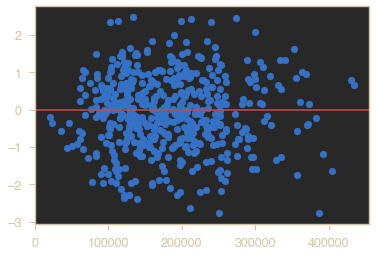

In [208]:
# Use np.random.randn to show what we expect in a residual plot
plt.scatter(predictions, np.random.randn(len(predictions)))
plt.axhline(0, color='r');

##### Coefficient of Determination

In [209]:
# Model scores with cross validation
lr_model_scores = cross_val_score(lr_model, X_train, y_train, cv=3)
lr_model_scores.mean()

0.7904328043218166

In [210]:
# Cross validate score
cross_val_score(lr_model, X, y, cv=5).mean()

0.7968703146984637

##### K-Fold Cross Validation

In [211]:
kf = KFold(n_splits=5, random_state=42)

for train_idx, test_idx in kf.split(X_train, y_train):
    X_train_fold = X_train.values[train_idx,:]
    y_train_fold = y_train.values[train_idx]
    
    X_test_fold = X_train.values[test_idx, :]
    y_test_fold = y_train.values[test_idx]
    
    fold_model = LinearRegression()
    fold_model.fit(X_train_fold, y_train_fold)
    print(fold_model.score(X_test_fold, y_test_fold))

0.7787618777956947
0.8034492601643218
0.7444729177485322
0.8181906182893022
0.8235107360346282


### Model Scaling

#### Ridge Regression

In [212]:
model_features = ['Lot_Area',      # Total square footage of land including and surounding house
                  'TotRms_AbvGrd', # Total rooms above ground 
                  'Overall_Qual',  # Overall quality of house
                  'Full_Bath',     # Total number of full bathrooms
                  'Bedroom_AbvGr', # Total number of bedrooms, excluding basement level
                  'Kitchen_Qual',  # Kitchen quality
                  'Gr_Liv_Area',   # Above ground living area in square feet
                  'Pool_Qual',     # Pool quality
                  'Garage_Cars',   # Size of garage in car capacity
                  'Bsmt_Qual',     # Basement quality
                  'Condition_1_RRNe',
                  'Condition_1_RRNn',
                  'Condition_2_Feedr',
                  'Condition_2_Norm',
                  'Condition_2_PosA',
                  'Condition_2_PosN',
                  'Condition_2_RRAe',
                  'Condition_2_RRAn',
                  'Condition_2_RRNn',
                  'Bldg_Type_2fmCon',
                  'Bldg_Type_2fmCon', 
                  'Bldg_Type_Duplex',    
                  'Bldg_Type_Twnhs',    
                  'Bldg_Type_TwnhsE',   
                  'House_Style_1.5Unf',   
                  'House_Style_1Story',    
                  'House_Style_2.5Fin',     
                  'House_Style_2.5Unf',     
                  'House_Style_2Story',     
                  'House_Style_SFoyer',     
                  'House_Style_SLvl']    
                  
X = df_train[model_features]
y = df_train['Sale_Price'] 

In [213]:
# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform our X data.
Xoverfit = poly.fit_transform(X)

In [214]:
# Split data
X_overfit_train, X_overfit_test, y_overfit_train, y_overfit_test = train_test_split(Xoverfit, y, test_size=0.7, random_state=42)

# Instantiate Standard Scaler.
ss_overfit = StandardScaler()

# Fit AND transform Standard Scaler to overfit data in one step.
# Z_overfit_train = pd.DataFrame(ss_overfit.fit_transform(X_overfit_train))
Z_overfit_train = ss_overfit.fit_transform(X_overfit_train)
Z_overfit_test =ss_overfit.transform(X_overfit_test)

In [215]:
Z_overfit_train[:10, :3]

array([[-0.72079824, -0.89301749, -0.333528  ],
       [-0.16324443,  0.39259268,  0.20651998],
       [-0.4256017 ,  0.39259268, -0.333528  ],
       [-0.23695433, -1.53582257, -0.87357598],
       [-1.4462964 , -0.89301749, -0.54954719],
       [-0.9915438 , -1.53582257, -0.333528  ],
       [-0.29085357, -0.89301749,  0.31452957],
       [ 0.44731627,  0.39259268,  0.96258714],
       [-0.54250238, -0.89301749,  0.20651998],
       [-0.32886861,  0.39259268,  0.20651998]])

In [216]:
# Instantiate.
ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(Z_overfit_train, y_overfit_train)

# Evaluate model using R2.
print(ridge_model.score(Z_overfit_train, y_overfit_train))
print(ridge_model.score(Z_overfit_test, y_overfit_test))

0.9105519531542274
0.8081313965542805


#### Lasso Regression

In [217]:
model_features = ['Lot_Area',      # Total square footage of land including and surounding house
                  'TotRms_AbvGrd', # Total rooms above ground 
                  'Overall_Qual',  # Overall quality of house
                  'Full_Bath',     # Total number of full bathrooms
                  'Bedroom_AbvGr', # Total number of bedrooms, excluding basement level
                  'Kitchen_Qual',  # Kitchen quality
                  'Gr_Liv_Area',   # Above ground living area in square feet
                  'Pool_Qual',     # Pool quality
                  'Garage_Cars',   # Size of garage in car capacity
                  'Bsmt_Qual',     # Basement quality
                  'Condition_1_RRNe', 
                  'Condition_1_RRNn',
                  'Condition_2_Feedr',
                  'Condition_2_Norm',
                  'Condition_2_PosA',
                  'Condition_2_PosN',
                  'Condition_2_RRAe',
                  'Condition_2_RRAn',
                  'Condition_2_RRNn',
                  'Bldg_Type_2fmCon',
                  'Bldg_Type_2fmCon', 
                  'Bldg_Type_Duplex',    
                  'Bldg_Type_Twnhs',    
                  'Bldg_Type_TwnhsE',   
                  'House_Style_1.5Unf',   
                  'House_Style_1Story',    
                  'House_Style_2.5Fin',     
                  'House_Style_2.5Unf',     
                  'House_Style_2Story',     
                  'House_Style_SFoyer',     
                  'House_Style_SLvl']    

X = df_train[model_features]
y = df_train['Sale_Price'] 

In [218]:
# Instantiate linear regression model without regularization.
lr_model = LinearRegression()

# Fit linear regression model.
lr_model.fit(Z_overfit_train, y_overfit_train)

# Generate predictions from linear regression model.
lr_preds = lr_model.predict(Z_overfit_test)

In [219]:
# Evaluate model.
# Estimate what model's R2 might be on new, out-of-sample data.
r2_score(y_overfit_test, lr_preds)

-1.964695536954105e+28

In [220]:
# Use R2 to see if model is overfit, underfit, or neither.
lr_preds_train = lr_model.predict(Z_overfit_train)
r2_score(y_overfit_train, lr_preds_train)

0.9230508994742026

# Final Model
<br>

Submitting to Kaggle, but can also be used for further experimentation.

In [ ]:
X_kaggle = df_test[model_features]

In [ ]:
X_kaggle['Sale_Price'] = lr_model.predict(X_kaggle)
X_kaggle.head()

In [ ]:
output = X_kaggle[['Sale_Price']]

In [ ]:
output

In [ ]:
output.to_csv("./gigilee_submission")